Importing Dependencies


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

Laoding the data

In [3]:
gold_data = pd.read_csv('/content/sample_data/gold_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [12]:
gold_data = gold_data.drop(columns=['Date'], axis=1)

<Axes: >

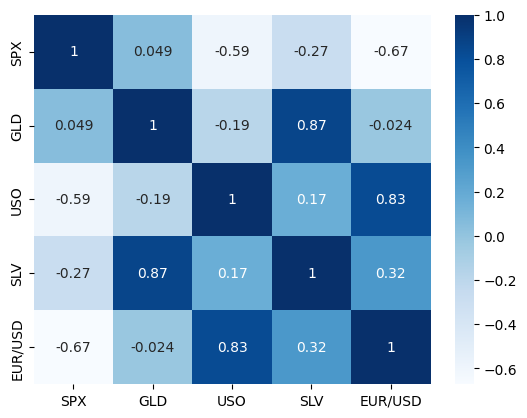

In [17]:
sns.heatmap(gold_data.corr(), annot=True, cmap='Blues', cbar=True)

Splitting the data

In [18]:
X = gold_data.drop(columns='EUR/USD', axis=1)
Y = gold_data['EUR/USD']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training

In [24]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [25]:
train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

In [26]:
training_r2_score = r2_score(Y_train, train_predictions)
testing_r2_score = r2_score(Y_test, test_predictions)

In [29]:
print("Training R2 score : ", training_r2_score)
print("Testing R2 score : ", testing_r2_score)

Training R2 score :  0.9972150214016888
Testing R2 score :  0.9826955969963163


In [30]:
training_mae = mean_absolute_error(Y_train, train_predictions)
testing_mae = mean_absolute_error(Y_test, test_predictions)

In [31]:
print("Training mean absolute error : ", training_mae)
print("Testing mean absolute error : ", testing_mae)

Training mean absolute error :  0.004289736703056753
Testing mean absolute error :  0.01153026834061139
